In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from tree_utils import *
import pandas as pd
import joblib


In [2]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl") 
best_tree = joblib.load("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/best_tree.pkl")

In [3]:
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

In [4]:

def pDecisionTree(Xdata, ydata):
    feature_names = Xdata.columns

    # Scale new data
    X_new_scaled = scaler.transform(Xdata)
    X_new = pd.DataFrame(X_new_scaled, columns=feature_names)
    y_true_encoded = label_encoder.transform(ydata)
    class_labels = label_encoder.classes_

    # Predict using the already-trained best_tree
    tree_pred = best_tree.predict(X_new)


    return X_new,tree_pred, y_true_encoded, class_labels  # Return both to allow accuracy calculation

def getAccuracy(y_pred, y_true_encoded, class_labels):
    acc = accuracy_score(y_true_encoded, y_pred)
    print(f"Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_true_encoded, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(xticks_rotation=45, cmap='Blues')
    

def add_encoded_labels_to_df(y_true_encoded, df):
    df_y_encoded = pd.DataFrame({"track_genre_encoded": y_true_encoded})
    df_combined = pd.merge(df, df_y_encoded, left_index=True, right_index=True)
    return df_combined

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9730


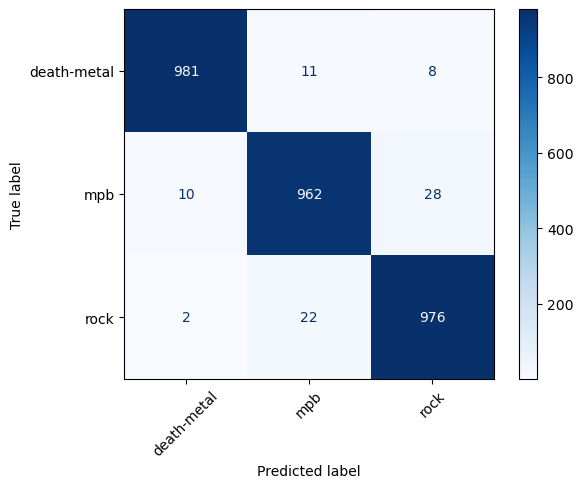

In [5]:
Xs = df.iloc[:, 4:18]
y = df["track_genre"]

t, x, y,z= pDecisionTree(Xs,y)
df_encoded_genr = add_encoded_labels_to_df(y, df)
getAccuracy(x,y,z)

In [6]:
df_with_leaf_nodes =  get_samples_leaf_nodes(best_tree, t)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [7]:
df_completo = pd.merge(df_with_leaf_nodes,df, left_index=True, right_index=True)
lista_colunas =  ['track_id', 'artists', 'album_name', 'track_name','popularity', 'duration_ms', 'explicit', 'danceability', 'leaf_node',
'energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
       
df_completo = df_completo[lista_colunas]

df_completo

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,leaf_node,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,210,0.497,1,-7.806,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,4,mpb
1,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,210,0.422,1,-13.338,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb
2,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,163,0.651,7,-8.658,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,4,mpb
3,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,158,0.420,4,-10.889,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,4,mpb
4,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,158,0.330,7,-13.703,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,4,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,78adEMnfn1XolaOh2QAjZS,Brujeria,Brujerizmo,Laboratorio Cristalitos,20,91866,False,0.474,125,0.993,1,-5.850,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,4,death-metal
2996,53c9YHuifgAWJoqgPOgPUn,Unleashed,Gods of Death Metal,Long Before Winter's Call,0,227616,False,0.370,21,0.993,7,-4.465,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,4,death-metal
2997,6us7QqYJGMGZqej8dKCFGC,Bury Your Dead,Cover Your Tracks,Mission: Impossible,21,162973,True,0.307,125,0.976,2,-3.552,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,4,death-metal
2998,5l5XKQmo9M0XHdNAPddq0i,Surra,Bica na Cara,Vida de Babaca,22,135893,True,0.362,209,0.994,6,-1.722,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,4,death-metal


In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def getAllRecommendationsWithDistances(df, feature_start=4, feature_end=19, n_neighbors=5):
    # Select and scale features
    X = df.iloc[:, feature_start:feature_end]
    X["leaf_node"] *2
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit NearestNeighbors model (+1 to include the point itself, which we'll remove)
    knn = NearestNeighbors(n_neighbors=n_neighbors + 1, metric='euclidean')
    knn.fit(X_scaled)

    # Find neighbors
    distances, indices = knn.kneighbors(X_scaled)

    # For each sample, build a dict of {index: distance}, excluding the point itself
    neighbors_dicts = [
        {int(idx): float(dist) for idx, dist in zip(idx_list[1:], dist_list[1:])}
        for idx_list, dist_list in zip(indices, distances)
    ]

    # Add to DataFrame
    df_with_recommendations = df.copy()
    df_with_recommendations["Recommendations"] = neighbors_dicts

    return df_with_recommendations


df_with_recommendations = getAllRecommendationsWithDistances(df_completo)

In [9]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

def interactive_pca_plot(df, genre):
    # === Filter and reduce to first 50 rows ===
    genre_df = df[df["track_genre"] == genre].copy()

    # === Prepare features ===
    features = genre_df.columns[4:19]  # Adjust if necessary
    X = genre_df[features]

    # === Run PCA ===
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # === Create DataFrame for plot ===
    pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    pca_df["track_name"] = genre_df["track_name"].values
    pca_df["index"] = genre_df.index
    pca_df["track_genre"] = genre_df["track_genre"].values
    pca_df["origin"] = genre_df.index  # each track is its own origin
    pca_df["type"] = "original"

    # === Add recommendations ===
    for idx in genre_df.index:
        recommendations = df.loc[idx, "Recommendations"]
        for rec_idx in recommendations:
            rec_row = df.loc[rec_idx]
            rec_features = rec_row[features].values.reshape(1, -1)
            rec_pca = pca.transform(rec_features)
            pca_df = pd.concat([
                pca_df,
                pd.DataFrame([{
                    "PC1": rec_pca[0, 0],
                    "PC2": rec_pca[0, 1],
                    "track_name": rec_row["track_name"],
                    "index": rec_idx,
                    "track_genre": rec_row["track_genre"],
                    "origin": idx,
                    "type": "recommendation"
                }])
            ], ignore_index=True)

    # === Define colors based on original song ===
    unique_origins = pca_df[pca_df["type"] == "original"]["origin"].unique()
    color_map = {
        idx: px.colors.qualitative.Safe[i % len(px.colors.qualitative.Safe)]
        for i, idx in enumerate(unique_origins)
    }
    pca_df["color"] = pca_df["origin"].map(color_map)

    # === Plot using only points with hover info ===
    fig = px.scatter(
        pca_df,
        x="PC1",
        y="PC2",
        color="color",
        hover_data={
            "track_name": True,
            "index": True,
            "track_genre": True,
            "type": True,
            "color": False,  # hide actual color code in hover
            "PC1": False,
            "PC2": False
        }
    )
    fig.update_traces(marker=dict(size=8, opacity=0.8), showlegend=False)
    fig.update_layout(title=f"PCA of {genre} Tracks + Recommendations (Hover for details)")
    fig.show()

interactive_pca_plot(df_with_recommendations, "mpb")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWar

In [10]:
import seaborn as sns
import pandas as pd

# Generate 106 unique colors using seaborn's HUSL palette
colors = sns.color_palette("husl", 106)
color_map = {i: tuple(int(c * 255) for c in rgb) for i, rgb in enumerate(colors)}
hex_map = {i: '#%02x%02x%02x' % color_map[i] for i in color_map}

# Create a DataFrame
leaf_node_colors = pd.DataFrame({
    'leaf_node': list(hex_map.keys()),
    'color_rgb': list(color_map.values()),
    'color_hex': list(hex_map.values())
})

df_with_recommendations = df_with_recommendations.merge(leaf_node_colors, on='leaf_node', how='left')

import plotly.express as px
from sklearn.decomposition import PCA

def plot_pca_with_recommendations(df, genre_name, recommendation_col="Recommendations", max_points=50):
    # Filter by genre
    df_genre = df[df["track_genre"] == genre_name].head(max_points)
    indices = df_genre.index.tolist()

    # Get original + recommended indices
    recommended_indices = set()
    for idx in indices:
        recommended_indices.update(df.loc[idx, recommendation_col])
    all_indices = list(set(indices + list(recommended_indices)))

    # Prepare PCA
    features = df.iloc[:, 4:19]  # Assuming these are your features
    pca = PCA(n_components=2)
    components = pca.fit_transform(features)

    df_plot = df.iloc[all_indices].copy()
    df_plot["PCA1"] = components[all_indices, 0]
    df_plot["PCA2"] = components[all_indices, 1]

    # Define color and hover info
    df_plot["hover"] = df_plot.index.astype(str) + " | " + df_plot["track_name"]

    fig = px.scatter(
        df_plot,
        x="PC1",
        y="PC2",
        color=df_plot["color_hex"],
        hover_data={
            "track_name": True,
            "index": True,
            "track_genre": True,
            "type": True,
            "color": False,  # hide actual color code in hover
            "PC1": False,
            "PC2": False
        }
        color_discrete_map="identity",  # Use exact HEX colors
    )
    fig.update_traces(marker=dict(size=10, opacity=0.8))
    fig.update_layout(title=f"PCA Plot for {genre_name} with Recommendations", showlegend=False)
    fig.show()
interactive_pca_plot(df_with_recommendations, "mpb")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1885366376.py, line 49)

In [23]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# Generate 106 unique colors using seaborn's HUSL palette
colors = sns.color_palette("husl", 106)
color_map = {i: tuple(int(c * 255) for c in rgb) for i, rgb in enumerate(colors)}
hex_map = {i: '#%02x%02x%02x' % color_map[i] for i in color_map}

# Create a DataFrame mapping leaf_node to colors
leaf_node_colors = pd.DataFrame({
    'leaf_node': list(hex_map.keys()),
    'color_rgb': list(color_map.values()),
    'color_hex': list(hex_map.values())
})

# Merge color info into your dataframe (make sure your main df is named `df`)
df_with_recommendations = df_with_recommendations.merge(leaf_node_colors, on='leaf_node', how='left')

def plot_pca_with_recommendations(df, genre_name, recommendation_col="Recommendations", max_points=1000):
    # Filter by genre
    df_genre = df[df["track_genre"] == genre_name].head(max_points)
    indices = df_genre.index.tolist()

    # Get original + recommended indices
    recommended_indices = set()
    for idx in indices:
        recommended_indices.update(df.loc[idx, recommendation_col])
    all_indices = list(set(indices + list(recommended_indices)))

    # Prepare PCA
    features = df.iloc[:, 4:19]
    pca = PCA(n_components=2)
    components = pca.fit_transform(features)

    df_plot = df.iloc[all_indices].copy()
    df_plot["PC1"] = components[all_indices, 0]
    df_plot["PC2"] = components[all_indices, 1]

    df_plot = df_plot.reset_index()  # To have 'index' as a column

    fig = px.scatter(
        df_plot,
        x="PC1",
        y="PC2",
        color="color_hex",    # <-- refer column name directly here
        hover_data={
            "track_name": True,
            "index": True,
            "track_genre": True,
            "color_hex": False,
            "PC1": False,
            "PC2": False
        },
        color_discrete_map="identity"
    )
    fig.update_traces(marker=dict(size=10, opacity=0.8))
    fig.update_layout(title=f"PCA Plot for {genre_name} with Recommendations", showlegend=False)
    fig.show()
    return df_plot

plot_pca_with_recommendations(df_with_recommendations, "mpb")  


,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,leaf_node,...,liveness,valence,tempo,time_signature,track_genre,Recommendations,color_rgb,color_hex,PC1,PC2
0,0,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,210,...,0.1430,0.457,112.195,4,mpb,"{903: 0.3561539903049497, 1: 0.429557809411248...",NaN,NaN,-80562.853088,100.539061
1,1,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,210,...,0.1550,0.546,112.219,4,mpb,"{409: 0.368132703397772, 1050: 0.3819468589284...",NaN,NaN,-142834.852958,104.818764
2,2,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,163,...,0.7260,0.652,119.567,4,mpb,"{577: 0.21933992544581027, 507: 0.247740857704...",NaN,NaN,26938.142892,42.397478
3,3,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,158,...,0.1230,0.553,96.313,4,mpb,"{196: 0.23101360555033743, 65: 0.2326479547135...",NaN,NaN,-15681.857078,42.045388
4,4,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,158,...,0.0849,0.373,136.408,4,mpb,"{1958: 0.21905339395027026, 530: 0.26436875721...",NaN,NaN,41778.142405,36.142028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,2900,45Rxs3b1V946PWpXj87qXF,In Element,Lyra,Anxiety,39,286285,False,0.496,133,...,0.4460,0.174,140.076,4,death-metal,"{2803: 0.2007380331387072, 2815: 0.25288905118...",NaN,NaN,54157.140331,7.757573
1265,2925,0v3WyEt2g04WFpfVwcnfXm,Candlemass,Epicus Doomicus Metallicus,Solitude,49,338440,False,0.229,90,...,0.1500,0.179,74.600,4,death-metal,"{2221: 0.4271341503034121, 2096: 0.42768129105...","(244, 91, 242)",#f45bf2,106312.138480,-29.728861
1266,2944,5SXom2SWwb8YxyfpUOQUp2,Cradle Of Filth,Thornography [Special Edition],Temptation,45,227706,False,0.574,90,...,0.2140,0.593,135.011,4,death-metal,"{889: 0.3066164489845149, 2360: 0.314851308124...","(244, 91, 242)",#f45bf2,-4421.861951,-26.101387
1267,2951,2bnsTOWLjWLNnWoDyT4S9E,Miss May I,Shadows Inside,Lost in the Grey,52,210889,False,0.437,125,...,0.2590,0.265,165.053,4,death-metal,"{2351: 0.20980646131233557, 2853: 0.2231200399...",NaN,NaN,-21238.859705,8.826298


In [20]:
plot_pca_with_recommendations(df_with_recommendations, "death-metal")  
plot_pca_with_recommendations(df_with_recommendations, "rock")  